# Outlier entfernen

### 💾 Employees Daten laden und Outlier entfernen.

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA
df = pd.read_csv("05_Employees.csv")
df

,Employee Name,Age,Last Working Day,Department,Education,Gender,Marital Status,Monthly Income,Years of Experience,Percent Salary Hike,Performance Rating
0,Jitesh,41,31-12-9999,Training,Masters,Male,Single,5993,8,11,3
1,Sanjit,49,31-12-9999,Sales,Masters,Male,Married,5130,1,23,5
2,John,37,31-12-9999,R&D,Doctorate,Male,Single,2090,6,15,3
3,Sandra,33,31-12-9999,Software Development,Undergraduate,Female,Married,2909,1,11,3
4,Madhu,27,31-12-9999,R&D,Masters,Male,Married,3468,9,12,3
5,Robert,32,31-12-9999,R&D,Masters,Male,Single,3068,0,13,3
6,Megan,59,31-12-9999,Software Development,Masters,Female,Married,2670,4,20,5
7,Matt,30,31-12-9999,R&D,Doctorate,Male,Divorced,2693,1,22,5
8,Will,38,01-03-2012,R&D,Doctorate,Male,Single,9526,0,21,5
9,George,36,31-12-9999,Software Development,Masters,NaN,Married,5237,6,13,3


### :¨· Daten Visualisieren
Visualisieren der Daten mit Hilfe eines Scatterplot.

In [3]:
# X UND Y-ACHSE
x = df[['Monthly Income']]
y = df[['Years of Experience']]

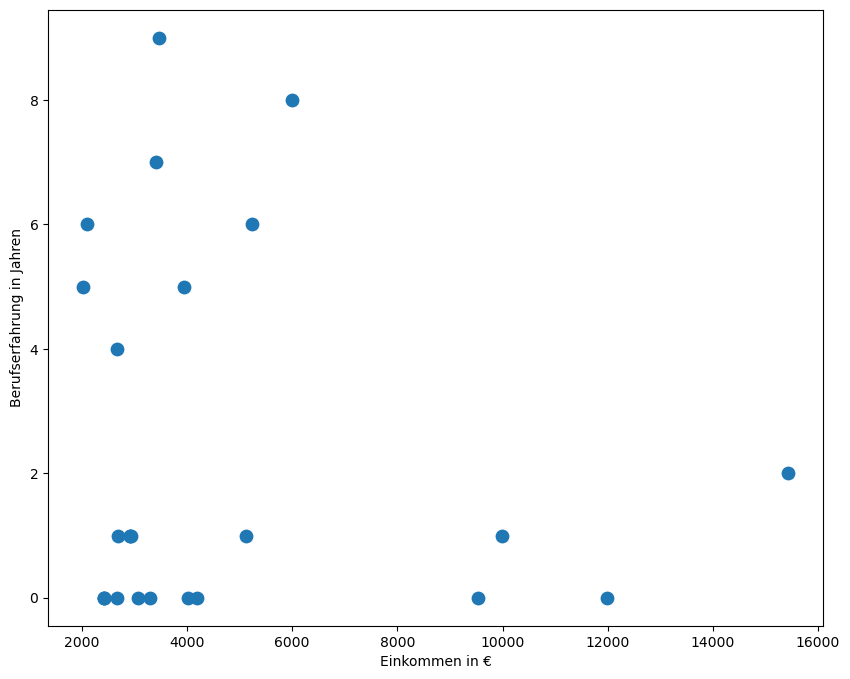

In [4]:
# SCATTERPLOT
plt.figure(figsize=(10, 8))

plt.scatter(x, y, s=80)
plt.xlabel('Einkommen in €')
plt.ylabel('Berufserfahrung in Jahren')

plt.show()

### 🔁 Cap Values mit Threshold
Outlier ab einem bestimmten Schwellenwert mit einem konstanten Wert ersetzen und Scatterplot erneut anzeigen.

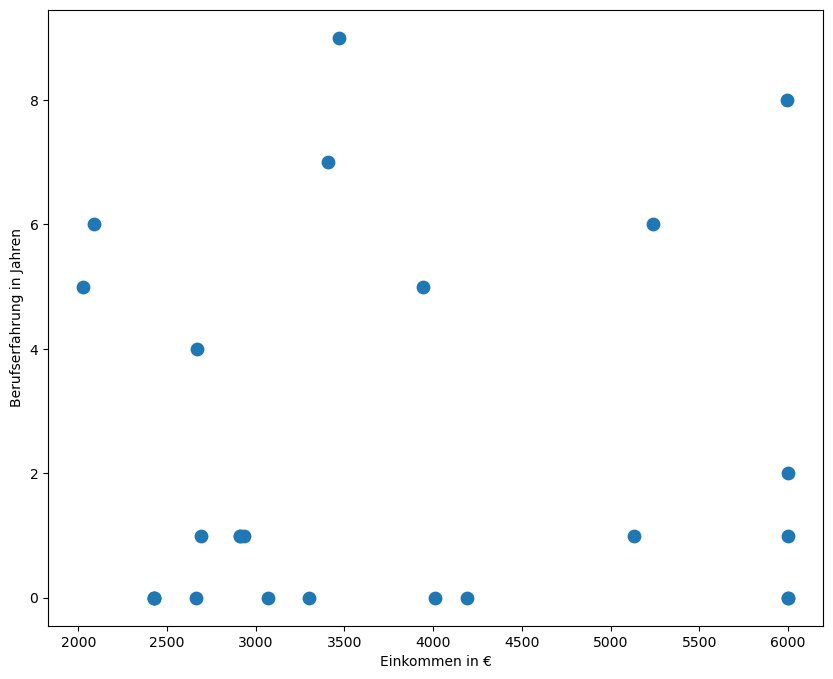

In [5]:
# SCHWELLENWERT & KONSTANTE
threshold = 6000
cap_value = 6000

# LAMDA FUNKTION AUF MONTHLY INCOME ANWENDEN (ERSETZEN WENN GRÖSSER THRESHOLD)
df['Monthly Income'] = df['Monthly Income'].apply(lambda x: cap_value if x > threshold else x)
x = df[['Monthly Income']]

# SCATTERPLOT
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=80)
plt.xlabel('Einkommen in €')
plt.ylabel('Berufserfahrung in Jahren')

plt.show()

### 🔁 Cap Values mit Perzentile
Outlier ersetzen, indem Werte unterhalb des 1% und 99% Perzentils durch die jeweiligen Perzentilgrenzen ersetzt werden. Visualisierung Vorher vs. Nachher mit Hilfe eines Boxplot und Histogramms.

### 💾 AdultCensus Daten laden und visualisieren.

In [6]:
# LOAD DATA
df2 = pd.read_csv('05_AdultCensus.csv')
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


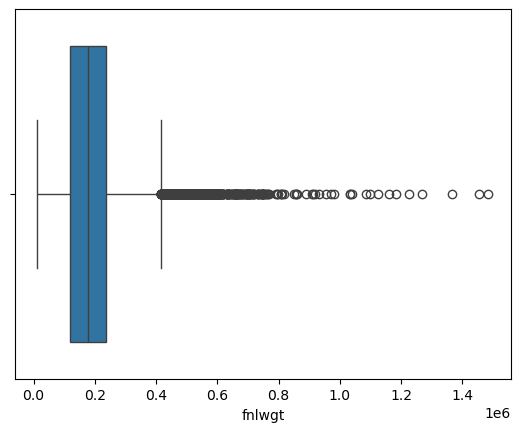

In [7]:
# BOXPLOT
sns.boxplot(x=df2['fnlwgt'])

plt.show()

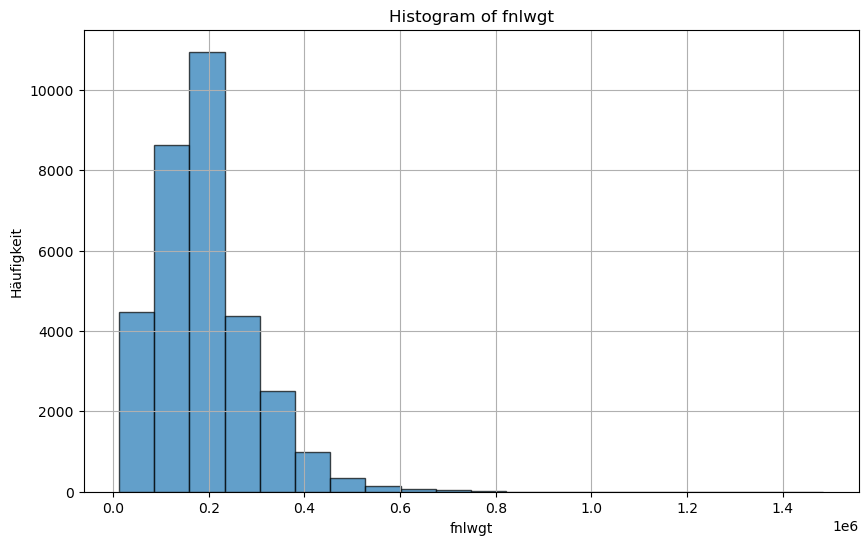

In [8]:
# HISTOGRAMM
plt.figure(figsize=(10, 6))
plt.hist(df2[['fnlwgt']], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Häufigkeit')
plt.grid(True)

plt.show()

In [17]:
# PERZENTILE (1% UND 99%) BERECHNEN
p1 = np.percentile(df2['fnlwgt'], 1)
p99 = np.percentile(df2['fnlwgt'], 99)


# FLOOR UND CAP VALUES DEFINIEREN


# CLIPPING & FLOORING ANWENDEN
df2['fnlwgt'] = np.clip(df2['fnlwgt'], p1, p99)

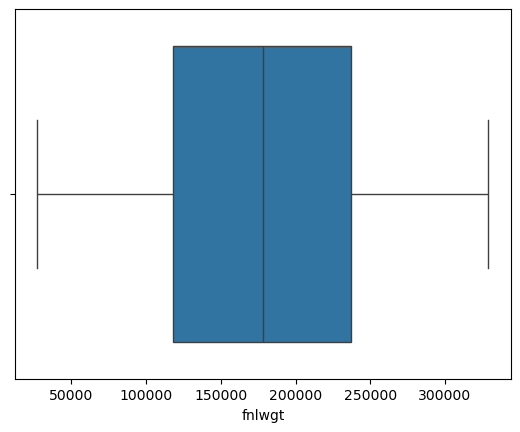

In [18]:
# BOXPLOT
sns.boxplot(x=df2['fnlwgt'])

plt.show()

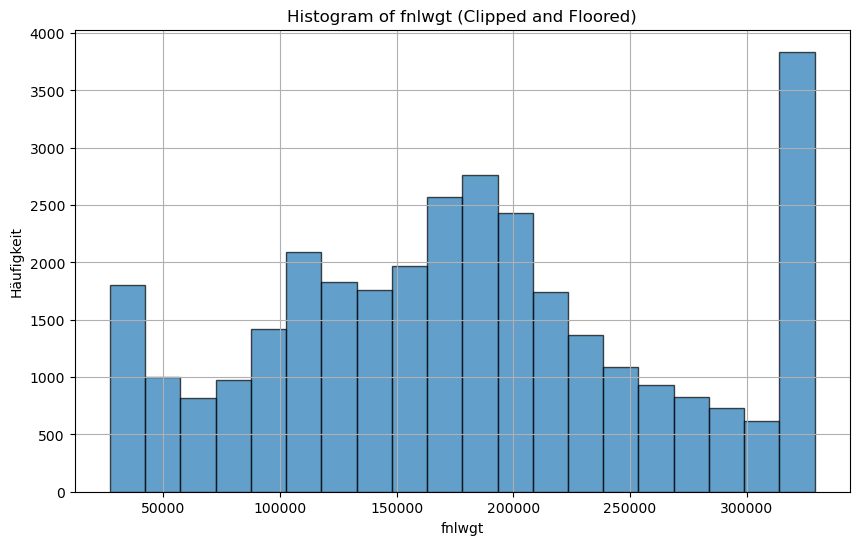

In [19]:
# HISTOGRAMM
plt.figure(figsize=(10, 6))
plt.hist(df2[['fnlwgt']], bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of fnlwgt (Clipped and Floored)')
plt.xlabel('fnlwgt')
plt.ylabel('Häufigkeit')
plt.grid(True)

plt.show()